In [49]:
import numpy as np
import pandas as pd

In [50]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [51]:
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [52]:
df.shape

(5572, 5)

In [53]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [54]:
df.rename(columns={'v1':'category','v2':'SMS'},inplace=True)
df.sample(10)

,category,SMS
523,ham,"That's very rude, you on campus?"
4373,ham,K and you're sure I don't have to have consent...
100,ham,Okay name ur price as long as its legal! Wen c...
817,ham,Also are you bringing galileo or dobby
491,spam,Congrats! 1 year special cinema pass for 2 is ...
1131,ham,"Sorry, I'll call later"
5314,spam,Get the official ENGLAND poly ringtone or colo...
3543,ham,Lol ok ill try to send. Be warned Sprint is de...
1,ham,Ok lar... Joking wif u oni...
1651,ham,I wan but too early lei... Me outside now wun ...


In [55]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [56]:
df['category'] = encoder.fit_transform(df['category'])

In [57]:
df.head()

,category,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
df.duplicated().sum()

403

In [59]:
df=df.drop_duplicates(keep='first')

In [60]:
df.duplicated().sum()

0

In [61]:
df.shape

(5169, 2)

In [62]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [63]:
import nltk

In [64]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# DATA PROCESSING

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
from nltk.corpus import stopwords
import string
from  nltk.stem.porter import PorterStemmer
psm=PorterStemmer()



def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    arr = []
    for i in text:
        if i.isalnum():
            arr.append(i)
    
    text = arr[:]
    arr.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            arr.append(i)
            
    text = arr[:]
    arr.clear()
    
    for i in text:
        arr.append(psm.stem(i))
    
            
    return " ".join(arr)

In [67]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [68]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [69]:
df['transformed_text'] = df['SMS'].apply(transform_text)
df.head()

,category,SMS,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [70]:
pip install  wordcloud

Note: you may need to restart the kernel to use updated packages.


In [71]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [72]:
spam_wc = wc.generate(df[df['category'] == 1]['transformed_text'].str.cat(sep=" "))

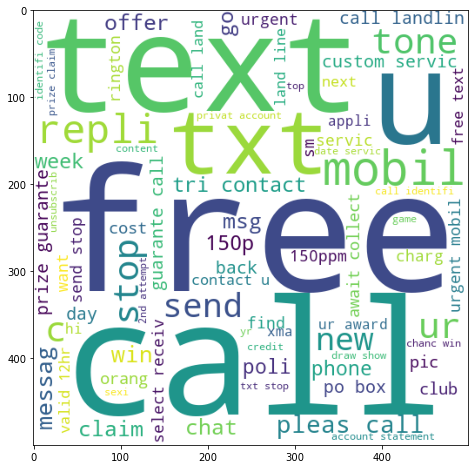

In [73]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

In [74]:
ham_wc = wc.generate(df[df['category'] == 0]['transformed_text'].str.cat(sep=" "))

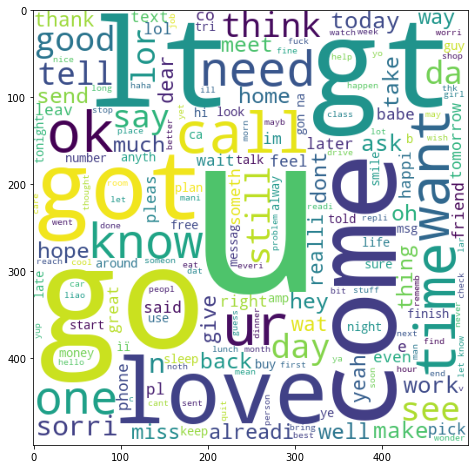

In [75]:
plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

In [76]:
df.head()

,category,SMS,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [77]:
spam_corpus = []
for msg in df[df['category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [78]:
ham_corpus = []
for msg in df[df['category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# MODEL BUILDING/PROCESSING APPROACH PART 1

In [79]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [80]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [81]:
X.shape

(5169, 3000)

In [82]:
Y = df['category'].values

In [83]:
from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=3)

In [84]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [85]:
print(Y_train)

[0 1 0 ... 0 0 0]


In [86]:
X_train.shape

(3876, 3000)

In [87]:
Y_train.shape

(3876,)

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

#gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [89]:
mnb.fit(X_train,Y_train)
Y_pred1 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.9698375870069605
[[1111    0]
 [  39  143]]
1.0


In [90]:
bnb.fit(X_train,Y_train)
Y_pred2 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9783449342614076
[[1108    3]
 [  25  157]]
0.98125


In [91]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train,Y_train)
Y_pred3 = svc.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9721577726218097
[[1107    4]
 [  32  150]]
0.974025974025974


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
# Define models to train
names = ["Logistic Regression","SVC linear", "Naive Bayes", "Decision Tree", "K Nearest Neighbors", "Random Forest", "Bagging", "Extra Trees", "Gradient Boosting"]
classifiers = [
    LogisticRegression(),
    SVC(kernel = 'sigmoid', gamma=1.0),
    MultinomialNB(),
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=50, random_state=2),
    BaggingClassifier(n_estimators=50, random_state=2),
    ExtraTreesClassifier(n_estimators=50, random_state=2),
    GradientBoostingClassifier(n_estimators=50, random_state=2)
]    
models = zip(names, classifiers)

for name,model in models:
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    #print(confusion_matrix(Y_test,y_pred))
    precision = precision_score(Y_test,y_pred)
    print("{} : ACCURACY = {}  PRECISION = {}".format(name,accuracy,precision))

Logistic Regression : ACCURACY = 0.9443155452436195  PRECISION = 0.9741379310344828
SVC linear : ACCURACY = 0.9721577726218097  PRECISION = 0.974025974025974
Naive Bayes : ACCURACY = 0.9698375870069605  PRECISION = 1.0
Decision Tree : ACCURACY = 0.9419953596287703  PRECISION = 0.9147286821705426
K Nearest Neighbors : ACCURACY = 0.9071925754060325  PRECISION = 1.0
Random Forest : ACCURACY = 0.9675174013921114  PRECISION = 1.0
Bagging : ACCURACY = 0.9667440061871616  PRECISION = 0.9483870967741935
Extra Trees : ACCURACY = 0.974477958236659  PRECISION = 0.9933774834437086
Gradient Boosting : ACCURACY = 0.9435421500386698  PRECISION = 0.990990990990991


In [94]:
print("pani")

pani


In [95]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,Y_train)
y_pred5 = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred5))
print("Precision",precision_score(Y_test,y_pred5))

Accuracy 0.9775715390564579
Precision 1.0


In [97]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))